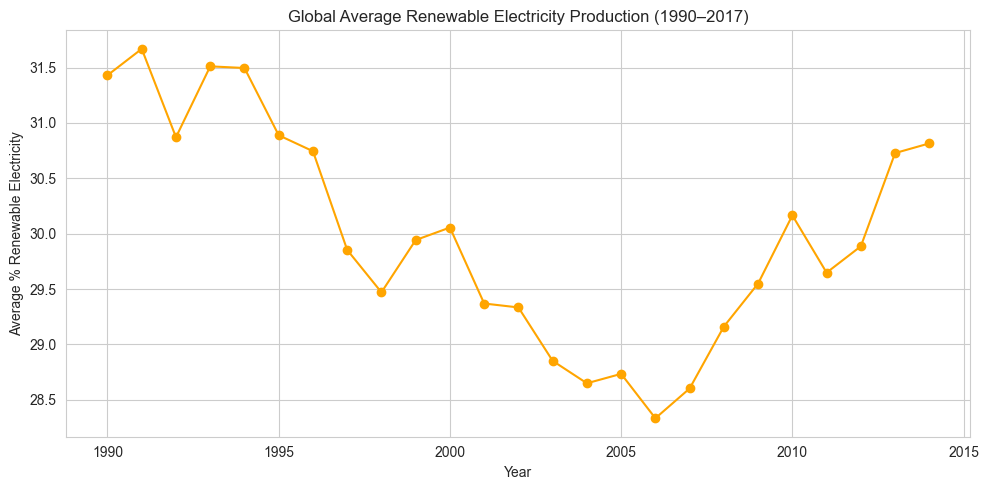

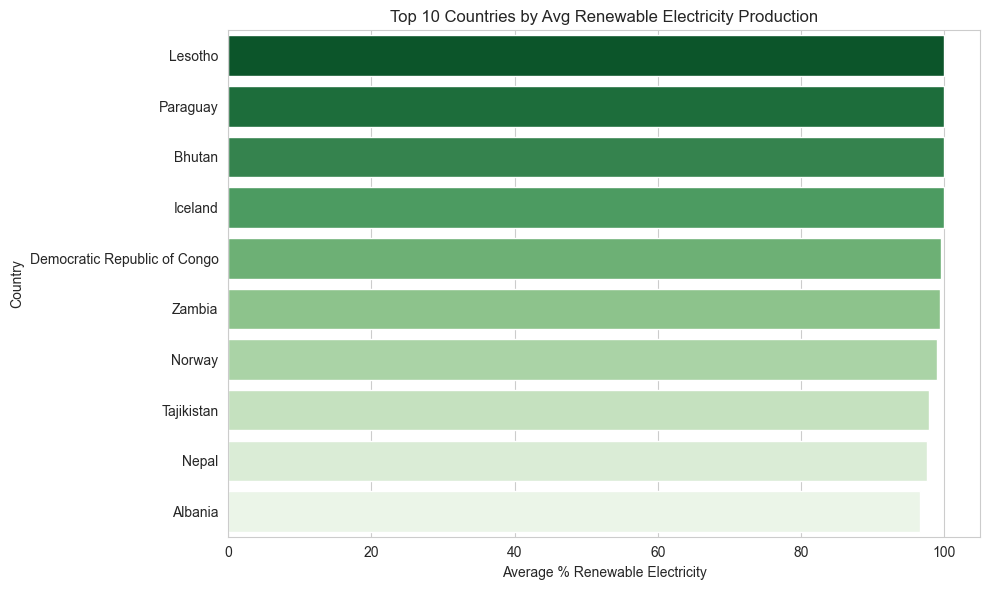

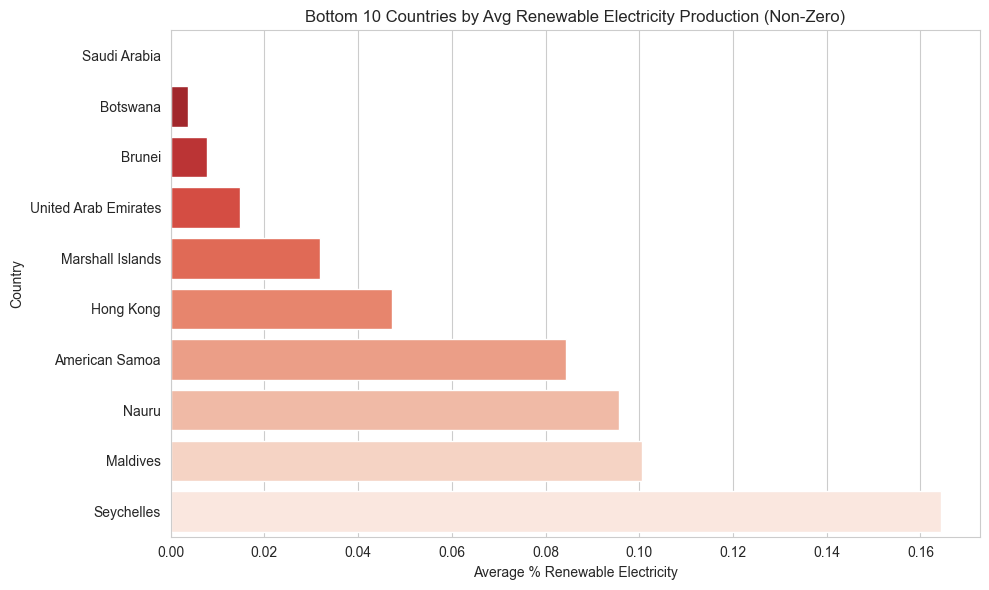

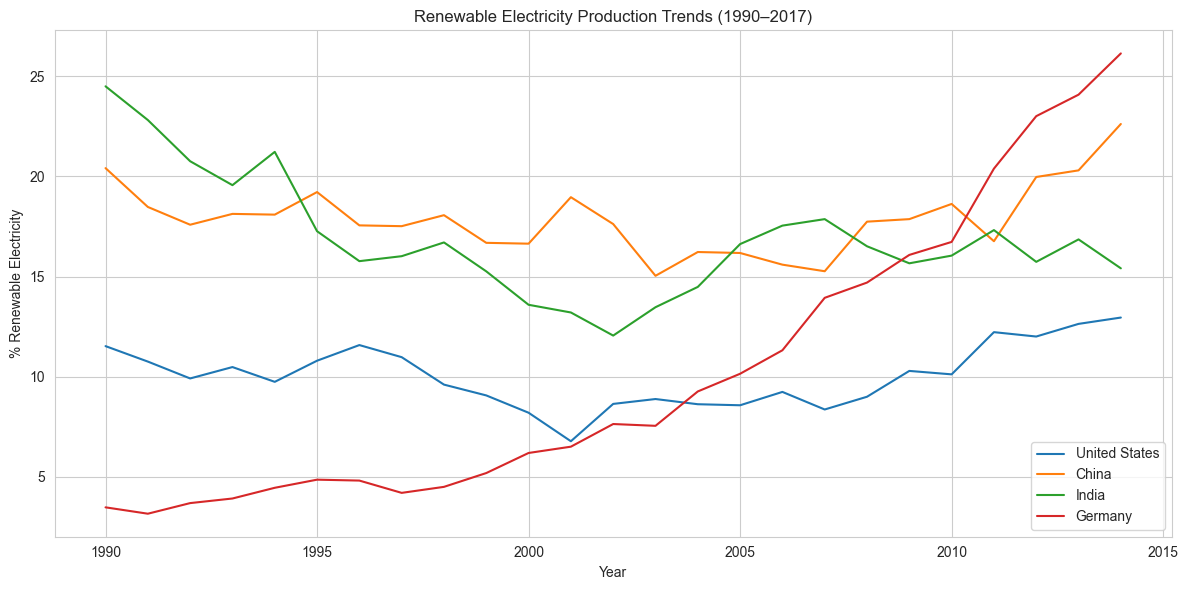

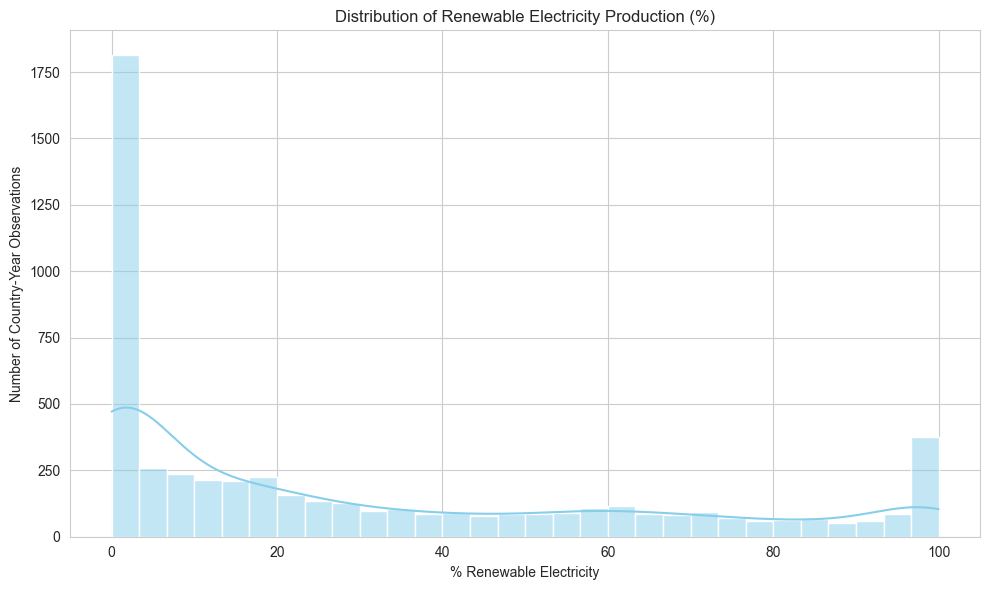

In [4]:
# Renewable Electricity Production Visualization Dashboard

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("share-of-electricity-production-from-renewable-sources.csv")

# Rename column for easier handling
df.rename(columns={"Renewable electricity (% electricity production)": "Renewable_Share"}, inplace=True)

# Clean dataset (remove rows with NaN in Renewable_Share)
df_clean = df.dropna(subset=["Renewable_Share"])

# Set style
sns.set_style("whitegrid")

# 1️Global Average Renewable Electricity Production Trend
avg_by_year = df.groupby("Year")["Renewable_Share"].mean()
plt.figure(figsize=(10,5))
plt.plot(avg_by_year.index, avg_by_year.values, marker='o', color='orange')
plt.title("Global Average Renewable Electricity Production (1990–2017)")
plt.xlabel("Year")
plt.ylabel("Average % Renewable Electricity")
plt.grid(True)
plt.tight_layout()
plt.show()

# Top 10 Countries by Average Renewable Electricity Share
top10_countries = df_clean.groupby("Country")["Renewable_Share"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top10_countries.values, y=top10_countries.index, hue=bottom10_nonzero.index, palette="Greens_r",  legend=False)
plt.title("Top 10 Countries by Avg Renewable Electricity Production")
plt.xlabel("Average % Renewable Electricity")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# Bottom 10 Countries by Average Renewable Electricity Share (Non-Zero)
non_zero_countries = df_clean.groupby("Country")["Renewable_Share"].mean()
non_zero_countries = non_zero_countries[non_zero_countries > 0]
bottom10_nonzero = non_zero_countries.sort_values(ascending=True).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=bottom10_nonzero.values, y=bottom10_nonzero.index,hue=bottom10_nonzero.index, palette="Reds_r", legend=False)
plt.title("Bottom 10 Countries by Avg Renewable Electricity Production (Non-Zero)")
plt.xlabel("Average % Renewable Electricity")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# Trend for Selected Major Countries (USA, China, India, Germany)
selected_countries = ["United States", "China", "India", "Germany"]
plt.figure(figsize=(12,6))
for country in selected_countries:
    country_data = df_clean[df_clean["Country"] == country]
    plt.plot(country_data["Year"], country_data["Renewable_Share"], label=country)

plt.title("Renewable Electricity Production Trends (1990–2017)")
plt.xlabel("Year")
plt.ylabel("% Renewable Electricity")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Distribution of Renewable Electricity Share (Histogram)
plt.figure(figsize=(10,6))
sns.histplot(df_clean["Renewable_Share"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Renewable Electricity Production (%)")
plt.xlabel("% Renewable Electricity")
plt.ylabel("Number of Country-Year Observations")
plt.tight_layout()
plt.show()
